# 02: Data exploration, validation and cleaning

### Import

In [1]:
import numpy as np
import pandas as pd
import sklearn as skit
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

import seaborn as sns
import re

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('figure', figsize=(12, 8))



### Data load

In [1]:
df = pd.read_csv('data.csv')

NameError: name 'pd' is not defined

## Data types & measurement scales

* **Nominal (categorical)** (string or int) - Used for labeling variables, without any quantitative value and inherent order.
* **Dichotomous** (string or int) - Same as nominal with only two possible values.
* **Ordinal** (string or int) - Nominal with order, which is important and significant. Differences between values are not specified.
* **Numeric discrete** (int) - Ordered and differences have a clear meaning.
* **Numeric continuous (interval/ratio)** (float) - Any value in some admissible range.
* **Text** (string) - Multidimensional.
* **Date** (datetime, string)
* etc.

In [197]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NameLen,Title,Surname,Firstnames,ExactAge,NaNAge,KnownAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,23,Mr.,Braund,Owen Harris,False,False,True


In [4]:
# Show object dtype data 


In [5]:
# Recognize different data types (measurement scales)

# Nominal - Sex, Survived
# Ordinal - Embarked, Pclass,
# Numeric Discrete - SibSp, Parch, 
# Numeric continuous - Age, Fare
# Text - Name, Ticket

## Data validation

* Consistency - same things are represented in same way
* Domain - set (range) of admisible values
* Integrity - permitted relationships (titles x sex, age x birth year)
* etc.

### Consistency
same things are represented in same way

In [6]:
# Consistency check for Sex and Embarked
df.Sex.unique()

array(['male', 'female', 'Female', 'Male'], dtype=object)

In [7]:
df.Embarked.unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
# Repair inconsistent representations

In [9]:
df.Sex = df.Sex.str.lower()

In [10]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

### Domain
set (range) of admisible values

In [11]:
# Numbers of unique values for columns
df.nunique()
# nunique() # !!!!! nan are not counted !!!!

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
# Domain check for numerical data
df.describe()
# Fare has minimum 0 and max 500 - but those are valid values from domain point of view

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Boxplot 

Useful visualisation of domain for continuous data.
* The bottom and top of the box are always the first and third quartiles. Their difference is called the inter-quartile range (IQR).
* The band inside the box is always the second quartile (the median).
* Two lines (whiskers) outside the box extends to the smallest (minimum) and latgest (maximum) observation excluding outliers.
* Points correspond to “outliers” (determined by a rule of thumb) if they fall at least 1.5 IQR above the third quartile or below the first quartile.

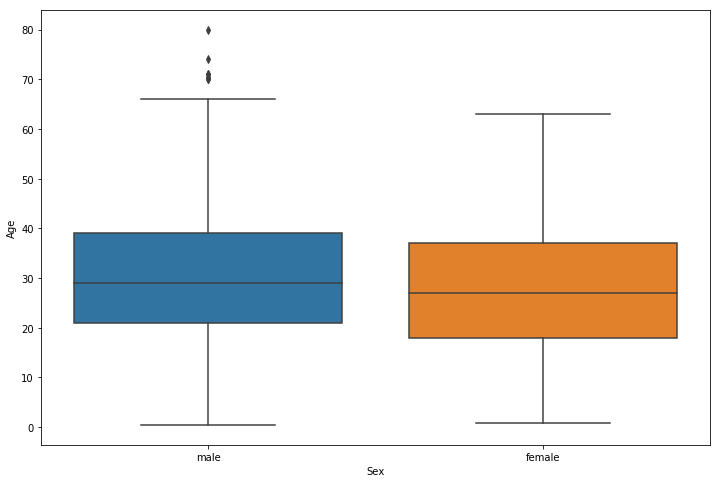

In [13]:
# Sex x Age boxplot
sns.boxplot(x='Sex', y='Age', data=df)

In [14]:
# Check Name at least via its length
df['NameLen'] = df.Name.str.len()

In [15]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22


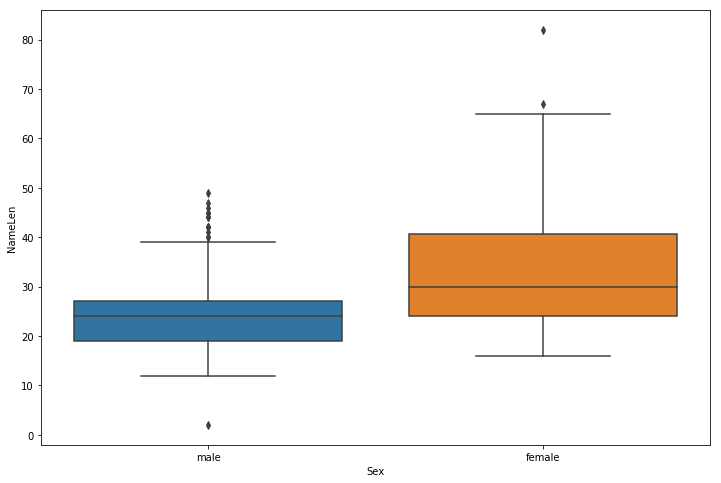

In [16]:
sns.boxplot(x='Sex', y='NameLen', data=df)

In [17]:
## See NameLen largest values
df.loc[df.NameLen.nlargest(3).index].Name.iloc[1]

'Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")'

In [18]:
## See NameLen smallest values
df.loc[df.NameLen.nsmallest(3).index].NameLen

711     2
692    12
826    12
Name: NameLen, dtype: int64

In [19]:
# Cabin check
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [20]:
df.Cabin.isnull().sum()

687

In [21]:
# Embarked check
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
df.Embarked.isnull().sum()

2

In [23]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,24


### Integrity
permitted relationships

In [24]:
# Integrity for name titles check
pattern = re.compile('\A\s*([^,]+),\s*([^\.]+\.)\s*([^\(]*)\s*(\(\s*([^\)]*)\s*\))?(.*)\Z')

def split_name(name):
    if type(name) is not str:
        res = ("-","-","-","-","-")
    else:
        m = pattern.match(name)
        if m:
            res = m.groups()
        else:
            res = ("-","-","-","-","-")
    return {'surname': res[0].strip(), 'title': res[1].strip(), 'firstname': res[2].strip()}

split_name("Turpin, Mrs. William John Robert")
split_name("Futrelle, Mrs. Jacques Heath (Lily May Peel)")

# use .apply(...)
df['Title'] = df.Name.apply(lambda x: split_name(x)['title'])
df['Surname'] = df.Name.apply(lambda x:split_name(x)['surname'])
df['Firstnames'] = df.Name.apply(lambda x:split_name(x)['firstname']) 

# print unique titles
df.Title.unique()


array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', '-', 'Capt.',
       'the Countess.', 'Jonkheer.'], dtype=object)

In [25]:
df['Title'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', '-', 'Capt.',
       'the Countess.', 'Jonkheer.'], dtype=object)

In [26]:
# Show titles for males and females
df[df.Sex == 'male'].Title.unique()
# Show the females with Dr. title
# df[(df['Sex'] == 'female') & (df['Title'] == 'Dr.')]
# df.query('Sex == "female" and Title == "Dr."')

array(['Mr.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Major.', 'Sir.', 'Col.',
       '-', 'Capt.', 'Jonkheer.'], dtype=object)

In [27]:
display(df[df.Sex == 'female'].Title.unique())

array(['Mrs.', 'Miss.', 'Mme.', 'Ms.', 'Lady.', 'Mlle.', 'the Countess.',
       'Dr.'], dtype=object)

In [28]:
df[(df.Sex == 'female') & (df.Title == 'Dr.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen,Title,Surname,Firstnames
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,27,Dr.,Leader,Alice


In [29]:
df.query('Sex == "female" and Title == "Dr."')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen,Title,Surname,Firstnames
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,27,Dr.,Leader,Alice


## Data cleaning

* convert data to standard format
* treat missing values
* fix errors and outliers

### Data conversion

In [30]:
# Show all non numeric fields
df.select_dtypes(include=['object']).head()

,Name,Sex,Ticket,Cabin,Embarked,Title,Surname,Firstnames
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr.,Braund,Owen Harris
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs.,Cumings,John Bradley
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss.,Heikkinen,Laina
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs.,Futrelle,Jacques Heath
4,"Allen, Mr. William Henry",male,373450,NaN,S,Mr.,Allen,William Henry


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
NameLen        891 non-null int64
Title          891 non-null object
Surname        891 non-null object
Firstnames     891 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 111.5+ KB


In [203]:
# Convert all values outside of the domain to numpy NaN
# In our case only ?? for Name
# fix also NameLen, Title, Surname and Firstnames
df.loc[df.Name == '??', 'Name'] = np.nan
df.loc[df.Name.isnull(), ['NameLen', 'Title', 'Surname', 'Sex']]

,NameLen,Title,Surname,Sex
711,NaN,-,-,male


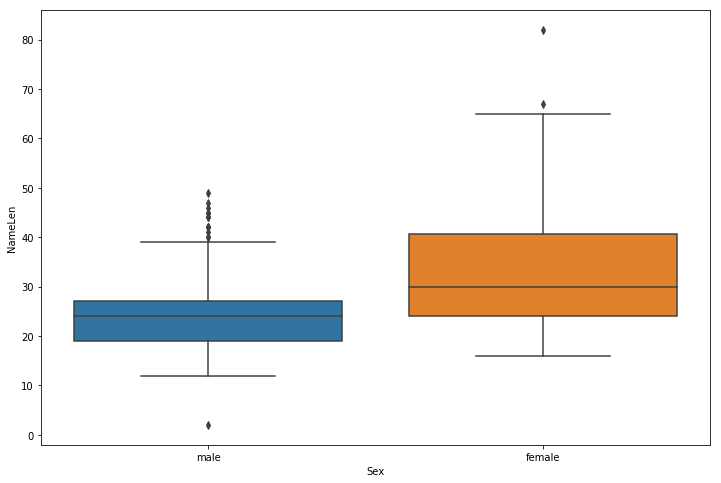

In [198]:
sns.boxplot(x='Sex', y='NameLen', data=df)

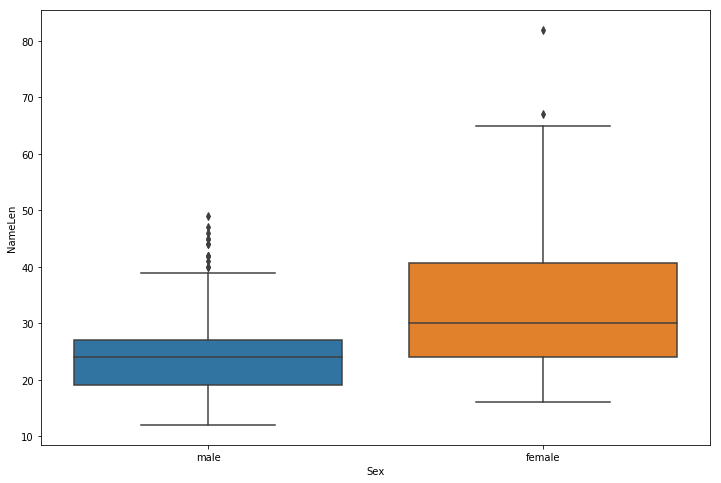

In [201]:
df['NameLen'] = df.Name.str.len()
sns.boxplot(x='Sex', y='NameLen', data=df)

#### Pandas categorical data 
suitable for storing nominal and ordinal values

In [34]:
# Convert nominal values stored in strings to pandas categorical format
# https://pandas.pydata.org/pandas-docs/stable/categorical.html

# Sex and Title
df.Sex = df.Sex.astype('category', categories = ['male', 'female'], ordered = False)
# use .astype('category',...)

# show results

In [35]:
df.Sex.dtype

category

In [36]:
display(df['Title'].describe())
# df['Title'].unique()

count     891
unique     18
top       Mr.
freq      516
Name: Title, dtype: object

In [37]:
df.Pclass = df.Pclass.astype('category', categories = [1, 2, 3], ordered = True)

In [38]:
df.Pclass

0      3
1      1
2      3
3      1
4      3
5      3
6      1
7      3
8      3
9      2
10     3
11     1
12     3
13     3
14     3
15     2
16     3
17     2
18     3
19     3
20     2
21     2
22     3
23     1
24     3
25     3
26     3
27     1
28     3
29     3
      ..
861    2
862    1
863    3
864    2
865    2
866    2
867    1
868    3
869    3
870    3
871    1
872    1
873    3
874    2
875    3
876    3
877    3
878    3
879    1
880    2
881    3
882    3
883    2
884    3
885    3
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [39]:
# Convert ordinal values - Pclass and Embarked
display(df['Pclass'].unique())
# display(df['Embarked'].unique())

# use .astype('category', categories = [], ordered = True)

[3, 1, 2]
Categories (3, int64): [1 < 2 < 3]

In [40]:
df.Embarked = df.Embarked.astype('category', categories = ['S', 'C', 'Q'], ordered = True)

In [41]:
df.Embarked

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: category
Categories (3, object): [S < C < Q]

In [42]:
# Embarked order:

# 10th April 1912	9:30-11:30 a.m. Southampton 
# 10th April 1912	18:30  Cherbourg, France
# 11th April 1912	11.30 am Queenstown, Ireland

# Results
df['Pclass'].dtype

category

In [43]:
display(df['Pclass'].unique())

[3, 1, 2]
Categories (3, int64): [1 < 2 < 3]

In [44]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [45]:
display(df['Embarked'].unique())

[S, C, Q, NaN]
Categories (3, object): [S < C < Q]

#### Dummy indicator representation of categorical data
Flags of individual category membership.

In [46]:
# Show dummy indicators for embarked
pd.get_dummies(df['Embarked']).head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [47]:
pd.get_dummies(df['Embarked'])[df['Embarked'].isnull()]

,S,C,Q
61,0,0,0
829,0,0,0


In [48]:
df.iloc[61].Embarked

nan

In [49]:
# create dummy indicator for predicted Age which is of type xx.5
df['ExactAge'] = (df.Age%1 ==.5)

In [50]:
df[df.ExactAge == True] .ExactAge

57     True
111    True
116    True
122    True
123    True
148    True
152    True
153    True
203    True
227    True
296    True
331    True
525    True
676    True
735    True
767    True
814    True
843    True
Name: ExactAge, dtype: bool

In [51]:
# change it to dichotomous categorical data
df['ExactAge'] = df['ExactAge'].astype('category', categories=[False, True], ordered=True)

# NaNs are treated as False

In [52]:
df['ExactAge'].describe()
# treat nan as nan


count       891
unique        2
top       False
freq        873
Name: ExactAge, dtype: object

In [53]:
df.loc[df['Age'].isnull(), 'ExactAge'] = np.nan
df[df.Age.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen,Title,Surname,Firstnames,ExactAge
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,16,Mr.,Moran,James,NaN
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,28,Mr.,Williams,Charles Eugene,NaN
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,23,Mrs.,Masselmani,Fatima,NaN
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,23,Mr.,Emir,Farred Chehab,NaN
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,29,Miss.,O'Dwyer,"Ellen ""Nellie""",NaN


In [54]:
# Fare 0 situation - indicator of 0 Fare

In [55]:
# Final data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null category
Name           890 non-null object
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
NameLen        891 non-null int64
Title          891 non-null object
Surname        891 non-null object
Firstnames     891 non-null object
ExactAge       714 non-null category
dtypes: category(4), float64(2), int64(5), object(6)
memory usage: 94.4+ KB


### Outliers detection
* single feature - rule of thumb - Outliers outside of interval (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) where:
    * Q1 - first quartile
    * Q2 - second quartile
    * IQR - Inter Quartile Range = Q3 - Q1 (middle 50%)
* multiple feature

In [56]:
# Single feature

# Compute IQR for all numeric lengths
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [57]:
IQR

PassengerId    445.0000
Survived         1.0000
Age             17.8750
SibSp            1.0000
Parch            0.0000
Fare            23.0896
NameLen         10.0000
dtype: float64

In [58]:
df[(df['NameLen'] > Q3['NameLen'] + 5*IQR['NameLen']) | (df['NameLen'] < Q1['NameLen'] - 1.5*IQR['NameLen'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen,Title,Surname,Firstnames,ExactAge
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.90,C65,C,82,Mrs.,Penasco y Castellana,Victor de Satode,False
711,712,0,1,NaN,male,NaN,0,0,113028,26.55,C124,S,2,-,-,-,NaN


In [59]:
# rule of thump interval edges for all numeric lengths


single_out_tab = pd.concat
display(single_out_tab)

<function pandas.core.reshape.concat.concat>

In [60]:
pd.Series

pandas.core.series.Series

In [76]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,NameLen
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,26.947250
std,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429,9.314391
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,2.000000
25%,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400,20.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,25.000000
75%,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000,30.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,82.000000


In [75]:
# Show minimal and maximal values
df.describe().loc[['min','max']]

,PassengerId,Survived,Age,SibSp,Parch,Fare,NameLen
min,1.0,0.0,0.42,0.0,0.0,0.0000,2.0
max,891.0,1.0,80.00,8.0,6.0,512.3292,82.0


In [80]:
df.describe().apply(lambda x: pd.Series([x.min(), x.max()]))

,PassengerId,Survived,Age,SibSp,Parch,Fare,NameLen
0,1.0,0.0,0.42,0.0,0.0,0.0,2.0
1,891.0,891.0,714.00,891.0,891.0,891.0,891.0


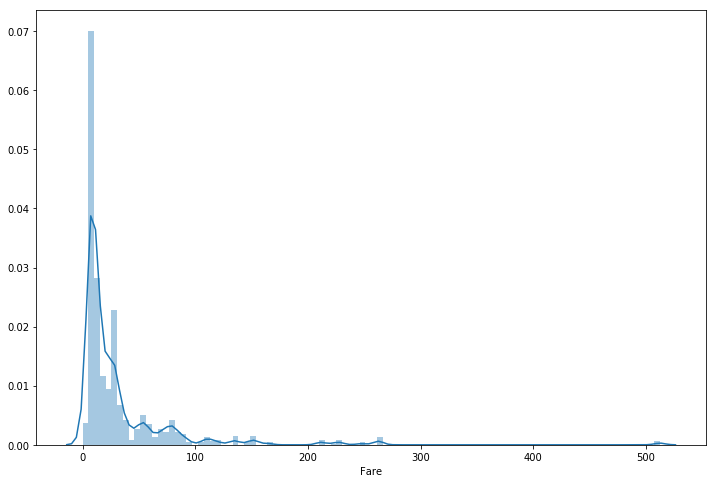

In [89]:
sns.distplot(df['Fare'], bins=100)

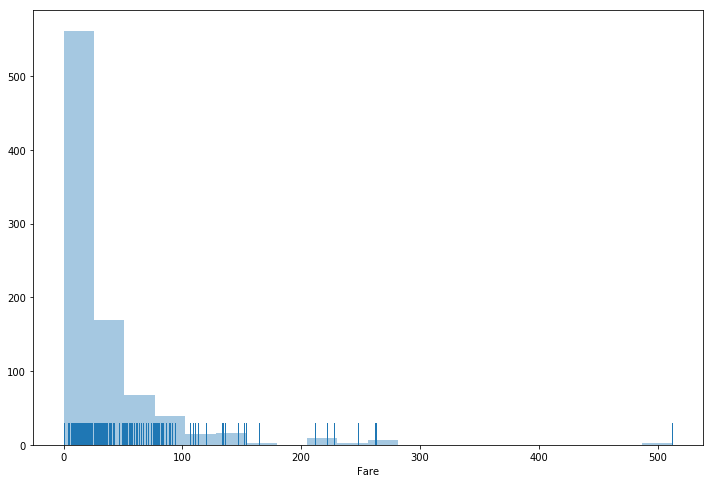

In [84]:
# Visualize distribution for detection of outliers with low probability
sns.distplot(df['Fare'], bins=20, kde = False, rug=True)

In [102]:
Q3['Fare']

31.0

In [98]:
# See possible outliers
# df[df['Fare'] > ...]
df.Fare[(df['Fare'] > Q3['Fare'] + 5*IQR['Fare']) | (df['Fare'] < Q1['Fare'] - 1.5*IQR['Fare'])]

27     263.0000
31     146.5208
88     263.0000
118    247.5208
195    146.5208
258    512.3292
268    153.4625
297    151.5500
299    247.5208
305    151.5500
311    262.3750
318    164.8667
332    153.4625
341    263.0000
377    211.5000
380    227.5250
438    263.0000
498    151.5500
527    221.7792
557    227.5250
609    153.4625
679    512.3292
689    211.3375
700    227.5250
708    151.5500
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
856    164.8667
Name: Fare, dtype: float64

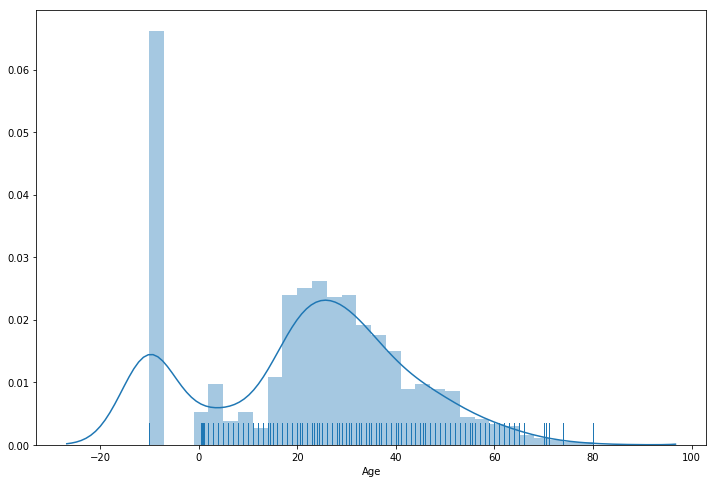

In [104]:
# Analyze Age with sns.distplot
sns.distplot(df['Age'].fillna(-10), bins=30, kde = True, rug=True)

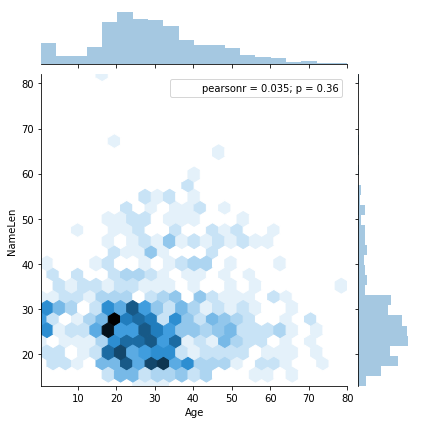

In [106]:
# Analyze Age and NameLen together
sns.jointplot(x='Age', y='NameLen', data = df, kind="hex")

In [107]:
# K means clustering demonstration 
data = df[['Age', 'NameLen']].dropna()

,Age,NameLen
0,22.0,23
1,38.0,51
2,26.0,22
3,35.0,44
4,35.0,24
6,54.0,23
7,2.0,30
8,27.0,49
9,14.0,35
10,4.0,31


In [115]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(data)

In [119]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

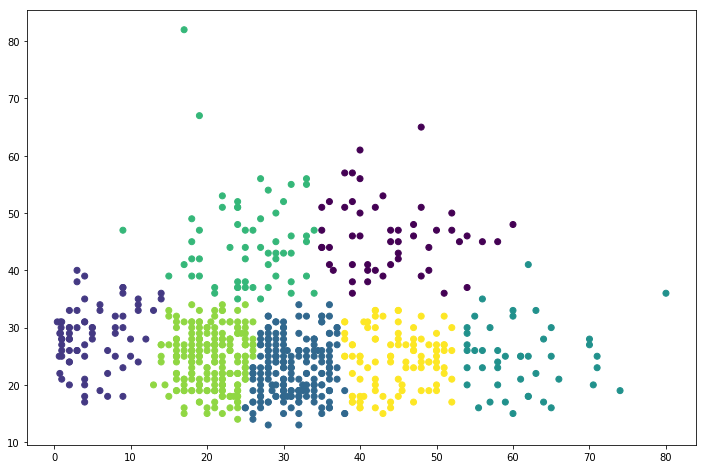

In [116]:
# plot
plt.scatter(x=data.Age, y=data.NameLen, c=kmeans.labels_)

In [121]:
# Find distances from cluster centroids
distances = kmeans.transform(data)

# see first point distances
distances[1,:]

array([  7.69572873,  39.88869271,  28.93659689,  34.9621665 ,
        13.97286738,  31.74739641,  27.47164453])

In [122]:
# Distances from nearest cluster centroids
min_distances = pd.Series(np.apply_along_axis(min, 1, distances))

# find 3 points with largest distance
df.loc[data.iloc[min_distances.nlargest(3).index].index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen,Title,Surname,Firstnames,ExactAge
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9,C65,C,82,Mrs.,Penasco y Castellana,Victor de Satode,False
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0,NaN,S,67,Miss.,Phillips,Kate Florence,False
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S,36,Mr.,Barkworth,Algernon Henry Wilson,False


### Handling of the missing data

* Deletion - removing of rows / features with missing data.
* Imputation - process of replacing missing data with substituted values.

In [145]:
# Counts of nan values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             1
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
NameLen          0
Title            0
Surname          0
Firstnames       0
ExactAge       177
dtype: int64

In [156]:
df[df.Name.isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen,Title,Surname,Firstnames,ExactAge
711,712,0,1,NaN,male,NaN,0,0,113028,26.55,C124,S,2,-,-,-,NaN


In [157]:
# Name 
df[df['Name'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLen,Title,Surname,Firstnames,ExactAge
711,712,0,1,NaN,male,NaN,0,0,113028,26.55,C124,S,2,-,-,-,NaN


In [158]:
# Drop rows with many NaNs

df.drop

# df.isnull().sum()

<bound method NDFrame.drop of      PassengerId  Survived Pclass  \
0              1         0      3   
1              2         1      1   
2              3         1      3   
3              4         1      1   
4              5         0      3   
5              6         0      3   
6              7         0      1   
7              8         0      3   
8              9         1      3   
9             10         1      2   
10            11         1      3   
11            12         1      1   
12            13         0      3   
13            14         0      3   
14            15         0      3   
15            16         1      2   
16            17         0      3   
17            18         1      2   
18            19         0      3   
19            20         1      3   
20            21         0      2   
21            22         1      2   
22            23         1      3   
23            24         1      1   
24            25         0      3   
25      

In [159]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             1
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
NameLen          0
Title            0
Surname          0
Firstnames       0
ExactAge       177
dtype: int64

In [160]:
# drop columns with too many nans
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.001122
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
NameLen        0.000000
Title          0.000000
Surname        0.000000
Firstnames     0.000000
ExactAge       0.198653
dtype: float64

In [166]:
df = df[df.columns[df.isnull().mean() < 0.7]]

In [167]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.001122
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
NameLen        0.000000
Title          0.000000
Surname        0.000000
Firstnames     0.000000
ExactAge       0.198653
dtype: float64

In [168]:
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NameLen,Title,Surname,Firstnames,ExactAge
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,19,Miss.,Icard,Amelie,False
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,41,Mrs.,Stone,George Nelson,False


In [170]:
# Fill missing Embarked

# See them first
embarked_null = df[df.Embarked.isnull()]
embarked_null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NameLen,Title,Surname,Firstnames,ExactAge
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,19,Miss.,Icard,Amelie,False
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,41,Mrs.,Stone,George Nelson,False


In [176]:
df.Embarked.dropna()

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: category
Categories (3, object): [S < C < Q]

In [180]:
# Impute values based on Pclass - most probable ones

table = pd.crosstab(df.Pclass, df.Embarked, margins=True)
display(table)
table2 = table.mul(100).floordiv(table.iloc[:,-1], axis=0).astype(str) + '%'
display(table2)
# https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html

Embarked,S,C,Q,All
Pclass,,,,
1,127,85,2,214
2,164,17,3,184
3,353,66,72,491
All,644,168,77,889


Embarked,S,C,Q,All
Pclass,,,,
1,59%,39%,0%,100%
2,89%,9%,1%,100%
3,71%,13%,14%,100%
All,72%,18%,8%,100%


In [182]:
df.loc[df.Embarked.isnull(),'Embarked'] = 'S'
df.loc[embarked_null.index]

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NameLen,Title,Surname,Firstnames,ExactAge
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S,19,Miss.,Icard,Amelie,False
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,S,41,Mrs.,Stone,George Nelson,False


In [187]:
# Age imputation is complicated!

# Search if missing Age is somehow related with survival
df['NaNAge'] = df['Age'].isnull().astype('category', ordered=True)

table = pd.crosstab(df.NaNAge, df.Survived, margins=True)
display(table)
table2 = table.mul(100).floordiv(table.iloc[:,-1], axis=0).astype(str) + '%'
display(table2)

Survived,0,1,All
NaNAge,,,
False,424,290,714
True,125,52,177
All,549,342,891


Survived,0,1,All
NaNAge,,,
False,59%,40%,100%
True,70%,29%,100%
All,61%,38%,100%


In [189]:
# Test the independence of Age and NaNAge

chi2, p, dof, ex = chi2_contingency(pd.crosstab(df.NaNAge, df.Survived), correction=False)
print('P-value:', p)

P-value: 0.00592268288618


Therefore MCAR (missing completely at random) and maybe MAR (missing at random) assumptions are probably not valid.

In [191]:
# A reasonable strategy for Age is thus substitute some artificial value and an indicator

df['KnownAge'] = ~ df['Age'].isnull()
df['Age'] = df['Age'].fillna(0)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null category
Name           890 non-null object
Sex            891 non-null category
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
NameLen        891 non-null int64
Title          891 non-null object
Surname        891 non-null object
Firstnames     891 non-null object
ExactAge       714 non-null category
NaNAge         891 non-null category
KnownAge       891 non-null bool
dtypes: bool(1), category(5), float64(2), int64(5), object(5)
memory usage: 89.3+ KB


In [193]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NameLen,Title,Surname,Firstnames,ExactAge,NaNAge,KnownAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,23,Mr.,Braund,Owen Harris,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,51,Mrs.,Cumings,John Bradley,False,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,22,Miss.,Heikkinen,Laina,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,44,Mrs.,Futrelle,Jacques Heath,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,24,Mr.,Allen,William Henry,False,False,True


Homework task: 

* Load the task_data.csv dataset (with data description in task_data_description.txt).
* Select at least 2 features with nominal scale, 1 with dichotomous scale, 2 with ordinal scale, 2 with discrete numeric scale, and 2 with numeric continuous scale.
* Validate domains of all those selected features.
* Convert them to proper format.
* Try to detect some outliers (hint: use GrLivArea and SalePrice).
* Determine all features with missing data.
    * Find a feature that should be completely droped from further analysis.
    * Select a feature with reasonable small portion of missing values (but with at least 5) and try to fill it properly.

In [194]:
hf = pd.read_csv('task_data.csv')

In [195]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n